In [1]:
import  pandas as pd

In [2]:
def read_hits(bed_file):
    hits = pd.read_csv(bed_file, delimiter="\t", names=[
            "chrom", "start", "end", "key", "strand", "peak_index",
            "imp_total_signed_score", "imp_total_score", "imp_frac_score",
            "imp_ic_avg_score", "agg_sim", "mod_delta", "mod_precision",
            "mod_percentile", "fann_perclasssum_perc", "fann_perclassavg_perc"
        ])
    hits = hits.sort_values(by=['imp_total_score'],ascending = False)
    #hits = hits.loc[spi1_peaks['key'] == "0_2"].loc[hits['strand'] == "+"]
    return hits


In [3]:
path_500M="/srv/scratch/anusri/chrombpnet_paper/src/evaluation/invivo_footprints/results/tfm_matches.bed"
path_100M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_100M/with_k562_bias_final_model/deepshap/tfm_matches.bed"
#path_50M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_50M/with_k562_bias_final_model/deepshap/tfm_matches.bed"
#path_25M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.30.2021_subsample_25M/with_k562_bias_final_model/deepshap/tfm_matches.bed"
path_5M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_10.01.2021_subsample_5M/with_k562_bias_final_model/deepshap/tfm_matches.bed"

In [4]:
data_500M_f = read_hits(path_500M)
data_100M_f = read_hits(path_100M)
#data_50M = read_hits(path_50M)
#data_25M = read_hits(path_25M)
#data_5M = read_hits(path_5M)

In [5]:
key_500M="0_1"
key_100M="0_1"

In [7]:
data_500M = data_500M_f.loc[data_500M_f['key'] == key_500M].loc[data_500M_f['strand'] == "+"]
data_100M = data_100M_f.loc[data_100M_f['key'] == key_100M].loc[data_100M_f['strand'] == "+"]

In [26]:
data_500M.head()

,chrom,start,end,key,strand,peak_index,imp_total_signed_score,imp_total_score,imp_frac_score,imp_ic_avg_score,agg_sim,mod_delta,mod_precision,mod_percentile,fann_perclasssum_perc,fann_perclassavg_perc
39282,chr1,22674328,22674340,0_1,+,4956,0.538032,0.547406,0.352793,0.052106,0.291339,0.000100,0.319444,0.091352,0.096224,0.176614
182417,chr1,39539375,39539387,0_1,+,22912,0.514670,0.517396,0.476343,0.037280,0.092995,0.000061,0.256410,0.062119,0.065773,0.121803
47247,chr7,156970318,156970330,0_1,+,5966,0.467448,0.491582,0.370371,0.034089,0.073240,0.000027,0.100000,0.040195,0.035323,0.006090
31076,chr6,30828667,30828679,0_1,+,3941,0.473573,0.484734,0.416412,0.048431,0.284742,0.000074,0.256410,0.069428,0.074300,0.152253
171516,chr5,168748484,168748496,0_1,+,21551,0.483598,0.483598,0.393777,0.044219,0.258417,0.000088,0.319444,0.080390,0.071864,0.045067


In [12]:
data_100M.head()

,chrom,start,end,key,strand,peak_index,imp_total_signed_score,imp_total_score,imp_frac_score,imp_ic_avg_score,agg_sim,mod_delta,mod_precision,mod_percentile,fann_perclasssum_perc,fann_perclassavg_perc
48517,chr13,101127894,101127906,0_1,+,8041,0.660794,0.697725,0.184379,0.052654,0.157372,0.000024,0.180952,0.110204,0.152041,0.814286
144095,chr18,3281638,3281650,0_1,+,23957,0.549185,0.653389,0.156807,0.044083,0.133624,0.000015,0.145833,0.070408,0.081633,0.178571
179310,chr6,39029607,39029619,0_1,+,29725,0.642306,0.642306,0.222334,0.045478,0.114251,0.000048,0.566667,0.195918,0.164286,0.144898
2901,chr12,92944036,92944048,0_1,+,462,0.611278,0.625335,0.172402,0.057385,0.141616,0.000012,0.092827,0.060204,0.082653,0.479592
51514,chrX,121308663,121308675,0_1,+,8547,0.390185,0.534054,0.166795,0.039154,0.099792,0.000020,0.168317,0.093878,0.119388,0.585714


In [14]:
print(data_500M.shape)

(25500, 16)


In [27]:
peak_index_500M = data_500M.head(1000)["peak_index"].values
peak_index_100M = data_100M.head(1000)["peak_index"].values

In [28]:
print(len(peak_index_500M))
print(len(set(peak_index_500M)))

1000
841


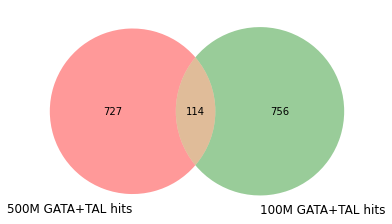

In [29]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
set1=set(list(peak_index_500M))
set2=set(list(peak_index_100M))
venn2([set1, set2], ('500M GATA+TAL hits', '100M GATA+TAL hits'))

plt.show()